## Can you use the following data to build....?
1. A model with an embedding layer and dense layers (but w/ no layers meant for sequential data)
2.  A model using Conv1d Layers
3.  A model with one sequential layer (LSTM or GRU)
4. A model with stacked sequential layers (LSTM or GRU)
- A model with bidirectional sequential layers 






In [17]:


import pandas as pd
bbc=pd.read_csv("https://storage.googleapis.com/dataset-uploader/bbc/bbc-text.csv")
bbc.head(5)

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


In [28]:
len(bbc)

2225

In [18]:
bbc.text[0]

'tv future in the hands of viewers with home theatre systems  plasma high-definition tvs  and digital video recorders moving into the living room  the way people watch tv will be radically different in five years  time.  that is according to an expert panel which gathered at the annual consumer electronics show in las vegas to discuss how these new technologies will impact one of our favourite pastimes. with the us leading the trend  programmes and other content will be delivered to viewers via home networks  through cable  satellite  telecoms companies  and broadband service providers to front rooms and portable devices.  one of the most talked-about technologies of ces has been digital and personal video recorders (dvr and pvr). these set-top boxes  like the us s tivo and the uk s sky+ system  allow people to record  store  play  pause and forward wind tv programmes when they want.  essentially  the technology allows for much more personalised tv. they are also being built-in to high

1)  Visualize the categories of your target variable and describe the dataset generally (the data includes news articles from the BBC news.)  A simple description is fine.

In [130]:
# This data set is composed by label and text data, we have 5 labels here, which are tech, business, sports, entertainment and politics. 
#The good thing is we dont have a lot punctuations here， we just have full stops here so it is easy to clear up.

In [19]:
cat=bbc.category.unique()
sumcat=bbc.category.value_counts()

<function matplotlib.pyplot.show(*args, **kw)>

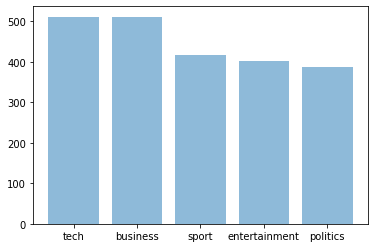

In [20]:
import numpy as np
import matplotlib.pyplot as plt
y_pos = np.arange(len(cat))
plt.bar(cat, sumcat, align='center', alpha=0.5)
plt.show

In [21]:
text=bbc.text

In [22]:
import re
text_clean=[]
for sentence in text:
    tmp=re.sub('[^A-Za-z0-9 ]',' ',sentence)
    text_clean.append(tmp)

In [23]:
text_len=[]
for sentence in text_clean:
    tmp=len(sentence.split())
    text_len.append(tmp)
#let's see the length of our text data
print(min(text_len))
print(max(text_len))

91
4491


In [24]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences 
tokenizer = Tokenizer()
tokenizer.fit_on_texts(text)
sequences = tokenizer.texts_to_sequences(text)
word_index = tokenizer.word_index


In [25]:
print('Found %s unique tokens.' % len(word_index))

Found 29726 unique tokens.


In [26]:
data = pad_sequences(sequences, maxlen=100)
label=bbc.category

In [27]:
#shuffle
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
label = label[indices]
label_dummy = pd.get_dummies(label)

In [37]:
#Train test split
x_train = data[:1500] 
y_train = label_dummy[:1500]
x_test = data[1500:]
y_test = label_dummy[1500:]

3)  Use the data to fit separate models to each of the following architectures:len(x_val)

A. A model with an embedding layer and dense layers (but w/ no layers meant for sequential data)

In [74]:
from keras.layers import Dense, Embedding
from keras.models import Sequential
from keras.layers import Flatten, Dense

model = Sequential()
model.add(Embedding(29726, 10, input_length=100))
model.add(Flatten())
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(5, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])
model.summary()

history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_15 (Embedding)     (None, 100, 10)           297260    
_________________________________________________________________
flatten_4 (Flatten)          (None, 1000)              0         
_________________________________________________________________
dense_14 (Dense)             (None, 32)                32032     
_________________________________________________________________
dense_15 (Dense)             (None, 5)                 165       
Total params: 329,457
Trainable params: 329,457
Non-trainable params: 0
_________________________________________________________________


D:\Anaconda3\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 1200 samples, validate on 300 samples
Epoch 1/10
1200/1200 [==============================] - 0s 176us/step - loss: 1.6355 - acc: 0.1792 - val_loss: 1.6160 - val_acc: 0.1733
Epoch 2/10
1200/1200 [==============================] - 0s 99us/step - loss: 1.5922 - acc: 0.2825 - val_loss: 1.5987 - val_acc: 0.2133
Epoch 3/10
1200/1200 [==============================] - 0s 100us/step - loss: 1.5575 - acc: 0.2458 - val_loss: 1.5791 - val_acc: 0.2133
Epoch 4/10
1200/1200 [==============================] - 0s 98us/step - loss: 1.4999 - acc: 0.3992 - val_loss: 1.5408 - val_acc: 0.2967
Epoch 5/10
1200/1200 [==============================] - 0s 102us/step - loss: 1.3991 - acc: 0.7025 - val_loss: 1.4681 - val_acc: 0.5667
Epoch 6/10
1200/1200 [==============================] - 0s 102us/step - loss: 1.2450 - acc: 0.8983 - val_loss: 1.3540 - val_acc: 0.6800
Epoch 7/10
1200/1200 [==============================] - 0s 98us/step - loss: 1.0538 - acc: 0.9525 - val_loss: 1.2186 - val_acc: 0.7233
Epoc

In [75]:
score, acc = model.evaluate(x_test, y_test)
print('Test score:', score)
print('Test accuracy:', acc)

725/725 [==============================] - 0s 12us/step
Test score: 0.8656800363803732
Test accuracy: 0.7848275899887085


In [77]:
result=pd.DataFrame({'model':['dense'],'test_score':[score],'test_acc':[acc]})
result

,model,test_score,test_acc
0,dense,0.86568,0.784828


B. A model using an Embedding layer with Conv1d Layers

In [78]:
from keras.layers import Conv1D, MaxPooling1D, GlobalMaxPooling1D
model = Sequential()
model.add(Embedding(29726, 10, input_length=100))
model.add(Conv1D(32, 3, activation='relu')) 
model.add(MaxPooling1D()) 
model.add(Conv1D(32, 3, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(5))
model.summary()

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_16 (Embedding)     (None, 100, 10)           297260    
_________________________________________________________________
conv1d_17 (Conv1D)           (None, 98, 32)            992       
_________________________________________________________________
max_pooling1d_10 (MaxPooling (None, 49, 32)            0         
_________________________________________________________________
conv1d_18 (Conv1D)           (None, 47, 32)            3104      
_________________________________________________________________
global_max_pooling1d_8 (Glob (None, 32)                0         
_________________________________________________________________
dense_16 (Dense)             (None, 5)                 165       
Total params: 301,521
Trainable params: 301,521
Non-trainable params: 0
_______________________________________________

D:\Anaconda3\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 1200 samples, validate on 300 samples
Epoch 1/10
1200/1200 [==============================] - 0s 144us/step - loss: 7.2339 - acc: 0.2192 - val_loss: 7.6305 - val_acc: 0.2333
Epoch 2/10
1200/1200 [==============================] - 0s 76us/step - loss: 8.3411 - acc: 0.2175 - val_loss: 7.6305 - val_acc: 0.2333
Epoch 3/10
1200/1200 [==============================] - 0s 70us/step - loss: 8.3411 - acc: 0.2175 - val_loss: 7.6305 - val_acc: 0.2333
Epoch 4/10
1200/1200 [==============================] - 0s 64us/step - loss: 8.3411 - acc: 0.2175 - val_loss: 7.6305 - val_acc: 0.2333
Epoch 5/10
1200/1200 [==============================] - 0s 66us/step - loss: 8.3411 - acc: 0.2175 - val_loss: 7.6305 - val_acc: 0.2333
Epoch 6/10
1200/1200 [==============================] - 0s 66us/step - loss: 8.3411 - acc: 0.2175 - val_loss: 7.6305 - val_acc: 0.2333
Epoch 7/10
1200/1200 [==============================] - 0s 66us/step - loss: 8.3411 - acc: 0.2175 - val_loss: 7.6305 - val_acc: 0.2333
Epoch 8

In [79]:
score, acc = model.evaluate(x_test, y_test)
print('Test score:', score)
print('Test accuracy:', acc)

725/725 [==============================] - 0s 22us/step
Test score: 7.916678674632105
Test accuracy: 0.24689655005931854


In [80]:
result=result.append({'model':'conv','test_score':score,'test_acc':acc},ignore_index=True)
result

,model,test_score,test_acc
0,dense,0.865680,0.784828
1,conv,7.916679,0.246897


C. A model using an Embedding layer with one sequential layer (LSTM or GRU)

In [81]:
from keras.layers import LSTM
model = Sequential()
model.add(Embedding(29726, 10, input_length=100))
model.add(LSTM(32))
model.add(Dense(5, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)


D:\Anaconda3\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 1200 samples, validate on 300 samples
Epoch 1/10
1200/1200 [==============================] - 1s 720us/step - loss: 1.6069 - acc: 0.2342 - val_loss: 1.6038 - val_acc: 0.2133
Epoch 2/10
1200/1200 [==============================] - 1s 546us/step - loss: 1.6007 - acc: 0.2433 - val_loss: 1.5820 - val_acc: 0.2133
Epoch 3/10
1200/1200 [==============================] - 1s 556us/step - loss: 1.4618 - acc: 0.3867 - val_loss: 1.3924 - val_acc: 0.4033
Epoch 4/10
1200/1200 [==============================] - 1s 566us/step - loss: 1.2448 - acc: 0.4500 - val_loss: 1.2758 - val_acc: 0.4000
Epoch 5/10
1200/1200 [==============================] - 1s 561us/step - loss: 1.1151 - acc: 0.4525 - val_loss: 1.2052 - val_acc: 0.4133
Epoch 6/10
1200/1200 [==============================] - 1s 596us/step - loss: 1.0248 - acc: 0.4592 - val_loss: 1.2497 - val_acc: 0.3933
Epoch 7/10
1200/1200 [==============================] - 1s 557us/step - loss: 0.9942 - acc: 0.4608 - val_loss: 1.1828 - val_acc: 0.4133
E

In [82]:
score, acc = model.evaluate(x_test, y_test)
print('Test score:', score)
print('Test accuracy:', acc)

725/725 [==============================] - 0s 123us/step
Test score: 1.2838923301367924
Test accuracy: 0.4386206865310669


In [101]:
result=result.append({'model':'lstm_1','test_score':score,'test_acc':acc},ignore_index=True)
result

,model,test_score,test_acc
0,dense,0.865680,0.784828
1,conv,7.916679,0.246897
2,lstm_1,1.283892,0.438621


D. A model using an Embedding layer with stacked sequential layers (LSTM or GRU)

In [108]:
from keras.layers import LSTM
model = Sequential()
model.add(Embedding(29726, 10, input_length=100))
model.add(LSTM(32, return_sequences=True))
model.add(LSTM(32))
model.add(Dense(5, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)

D:\Anaconda3\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 1200 samples, validate on 300 samples
Epoch 1/10
1200/1200 [==============================] - 2s 1ms/step - loss: 1.6064 - acc: 0.2308 - val_loss: 1.5999 - val_acc: 0.2133
Epoch 2/10
1200/1200 [==============================] - 1s 1ms/step - loss: 1.4875 - acc: 0.3158 - val_loss: 1.4553 - val_acc: 0.3433
Epoch 3/10
1200/1200 [==============================] - 1s 1ms/step - loss: 1.2314 - acc: 0.4025 - val_loss: 1.2211 - val_acc: 0.3567
Epoch 4/10
1200/1200 [==============================] - 1s 1ms/step - loss: 1.0691 - acc: 0.4117 - val_loss: 1.1804 - val_acc: 0.3467
Epoch 5/10
1200/1200 [==============================] - 1s 1ms/step - loss: 1.0059 - acc: 0.4175 - val_loss: 1.3478 - val_acc: 0.3167
Epoch 6/10
1200/1200 [==============================] - 1s 1ms/step - loss: 0.9633 - acc: 0.4367 - val_loss: 1.1577 - val_acc: 0.4533
Epoch 7/10
1200/1200 [==============================] - 1s 999us/step - loss: 0.9597 - acc: 0.5483 - val_loss: 1.2966 - val_acc: 0.3800
Epoch 8/10
12

In [109]:
score, acc = model.evaluate(x_test, y_test)
print('Test score:', score)
print('Test accuracy:', acc)

725/725 [==============================] - 0s 239us/step
Test score: 1.5074222331211484
Test accuracy: 0.3572413921356201


In [113]:
result=result.append({'model':'lstm_stack','test_score':score,'test_acc':acc},ignore_index=True)
result

,model,test_score,test_acc
0,dense,0.865680,0.784828
1,conv,7.916679,0.246897
2,lstm_1,1.283892,0.438621
3,lstm_stack,1.507422,0.357241


E. A model using an Embedding layer with bidirectional sequential layers

In [114]:
from keras.layers import Bidirectional
model = Sequential()
model.add(Embedding(29726, 10, input_length=100))
model.add(Bidirectional(LSTM(32)))
model.add(Dense(5, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])
history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

D:\Anaconda3\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 1200 samples, validate on 300 samples
Epoch 1/10
1200/1200 [==============================] - 1s 683us/step - loss: 1.6076 - acc: 0.2283 - val_loss: 1.6053 - val_acc: 0.2133
Epoch 2/10
1200/1200 [==============================] - 0s 334us/step - loss: 1.5998 - acc: 0.2425 - val_loss: 1.5990 - val_acc: 0.2133
Epoch 3/10
1200/1200 [==============================] - 0s 338us/step - loss: 1.5865 - acc: 0.2425 - val_loss: 1.5736 - val_acc: 0.2133
Epoch 4/10
1200/1200 [==============================] - 0s 356us/step - loss: 1.4828 - acc: 0.2517 - val_loss: 1.4483 - val_acc: 0.2633
Epoch 5/10
1200/1200 [==============================] - 0s 346us/step - loss: 1.2610 - acc: 0.4492 - val_loss: 1.3011 - val_acc: 0.3833
Epoch 6/10
1200/1200 [==============================] - 0s 339us/step - loss: 1.1757 - acc: 0.4175 - val_loss: 1.2878 - val_acc: 0.3500
Epoch 7/10
1200/1200 [==============================] - 0s 339us/step - loss: 1.1164 - acc: 0.4150 - val_loss: 1.2425 - val_acc: 0.3567
E

In [115]:
score, acc = model.evaluate(x_test, y_test)
print('Test score:', score)
print('Test accuracy:', acc)

725/725 [==============================] - 0s 139us/step
Test score: 1.175930090608268
Test accuracy: 0.35862070322036743


In [116]:
result=result.append({'model':'lstm_bidirectional','test_score':score,'test_acc':acc},ignore_index=True)
result

,model,test_score,test_acc
0,dense,0.865680,0.784828
1,conv,7.916679,0.246897
2,lstm_1,1.283892,0.438621
3,lstm_stack,1.507422,0.357241
4,lstm_bidirectional,1.175930,0.358621


F. Now retrain your best model from C, D, and E using dropout (you may need to increase epochs!).

In [117]:
#The best from C D E is the C
model = Sequential()
model.add(Embedding(29726, 10, input_length=100))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2)) 
model.add(Dense(5, activation='sigmoid'))

# try using different optimizers and different optimizer configs

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=50,
                    batch_size=32,
                    validation_split=0.2)

D:\Anaconda3\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 1200 samples, validate on 300 samples
Epoch 1/50
1200/1200 [==============================] - 2s 2ms/step - loss: 1.6079 - acc: 0.2383 - val_loss: 1.6014 - val_acc: 0.2133
Epoch 2/50
1200/1200 [==============================] - 2s 1ms/step - loss: 1.5990 - acc: 0.2600 - val_loss: 1.4804 - val_acc: 0.3733
Epoch 3/50
1200/1200 [==============================] - 2s 1ms/step - loss: 1.4465 - acc: 0.3650 - val_loss: 1.4215 - val_acc: 0.3500
Epoch 4/50
1200/1200 [==============================] - 2s 1ms/step - loss: 1.3014 - acc: 0.4217 - val_loss: 1.3525 - val_acc: 0.4033
Epoch 5/50
1200/1200 [==============================] - 2s 1ms/step - loss: 1.2135 - acc: 0.4392 - val_loss: 1.3460 - val_acc: 0.4000
Epoch 6/50
1200/1200 [==============================] - 2s 1ms/step - loss: 1.1303 - acc: 0.4467 - val_loss: 1.4187 - val_acc: 0.3933
Epoch 7/50
1200/1200 [==============================] - 2s 1ms/step - loss: 1.1397 - acc: 0.4417 - val_loss: 1.3433 - val_acc: 0.4033
Epoch 8/50
1200

In [118]:
score, acc = model.evaluate(x_test, y_test)
print('Test score:', score)
print('Test accuracy:', acc)

725/725 [==============================] - 0s 356us/step
Test score: 2.1368868114208355
Test accuracy: 0.5448275804519653


In [119]:
result=result.append({'model':'lstm_drop','test_score':score,'test_acc':acc},ignore_index=True)
result

,model,test_score,test_acc
0,dense,0.865680,0.784828
1,conv,7.916679,0.246897
2,lstm_1,1.283892,0.438621
3,lstm_stack,1.507422,0.357241
4,lstm_bidirectional,1.175930,0.358621
5,lstm_drop,2.136887,0.544828


In [ ]:
#After drop and more epochs, the acc increased 

4) Discuss 1) which model(s) performed best and speculate about 2) how you might try to further improve the predictive power of your model (e.g. Glove embeddings? More layers? Combining Conv1D with LSTM layers? More LSTM hidden nodes?)

In [ ]:
#The model in E performed the best, I will try Glove in the next step with model in E 

In [123]:
embeddings_index = {}
f = open('F:/Adv_ML/glove.6B/glove.6B.100d.txt',encoding="utf8")
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

In [125]:
embedding_matrix = np.zeros((len(word_index) + 1, 100))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector

In [126]:
model = Sequential()
model.add(Embedding(len(word_index) + 1, 100, weights=[embedding_matrix], input_length=100,trainable=False))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2)) 
model.add(Dense(5, activation='sigmoid'))

# try using different optimizers and different optimizer configs

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=50,
                    batch_size=32,
                    validation_split=0.2)

Train on 1200 samples, validate on 300 samples
Epoch 1/50
1200/1200 [==============================] - 2s 2ms/step - loss: 1.3312 - acc: 0.4408 - val_loss: 1.1492 - val_acc: 0.4733
Epoch 2/50
1200/1200 [==============================] - 2s 1ms/step - loss: 0.9879 - acc: 0.6633 - val_loss: 0.7165 - val_acc: 0.7800
Epoch 3/50
1200/1200 [==============================] - 2s 2ms/step - loss: 0.8473 - acc: 0.7242 - val_loss: 0.9218 - val_acc: 0.6733
Epoch 4/50
1200/1200 [==============================] - 2s 1ms/step - loss: 0.7678 - acc: 0.7367 - val_loss: 0.5295 - val_acc: 0.8333
Epoch 5/50
1200/1200 [==============================] - 2s 2ms/step - loss: 0.6622 - acc: 0.7733 - val_loss: 0.4926 - val_acc: 0.8633
Epoch 6/50
1200/1200 [==============================] - 2s 1ms/step - loss: 0.6667 - acc: 0.7950 - val_loss: 0.4330 - val_acc: 0.8733
Epoch 7/50
1200/1200 [==============================] - 2s 2ms/step - loss: 0.5744 - acc: 0.8142 - val_loss: 0.4919 - val_acc: 0.8600
Epoch 8/50
1200

In [127]:
score, acc = model.evaluate(x_test, y_test)
print('Test score:', score)
print('Test accuracy:', acc)

725/725 [==============================] - 0s 436us/step
Test score: 0.34005130554067675
Test accuracy: 0.931034505367279


In [128]:
result=result.append({'model':'lstm_Glove','test_score':score,'test_acc':acc},ignore_index=True)
result

,model,test_score,test_acc
0,dense,0.865680,0.784828
1,conv,7.916679,0.246897
2,lstm_1,1.283892,0.438621
3,lstm_stack,1.507422,0.357241
4,lstm_bidirectional,1.175930,0.358621
5,lstm_drop,2.136887,0.544828
6,lstm_Glove,0.340051,0.931035


In [129]:
#After using Glove, the accuracy dramatically increased to 0.93